<a href="https://colab.research.google.com/github/mizykk/House_Prices/blob/master/House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
cd drive/'My Drive'/Study/Kaggle/'House Prices'

/content/drive/My Drive/Study/Kaggle/House Prices


### Load Data

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Preprocessing


In [7]:
# 전처리를 위해 일시적으로 데이터 합치기
total = pd.concat([train, test], axis = 0)

### Missing Values 결측값

In [8]:
miss = pd.DataFrame({'count':total.isnull().sum().values,
              'per':(total.isnull().sum().values/len(total))*100}, total.isnull().sum().index)
miss[miss['count']>0].sort_values(by = 'count', ascending = False).T

,PoolQC,MiscFeature,Alley,Fence,SalePrice,FireplaceQu,LotFrontage,GarageCond,GarageYrBlt,GarageFinish,GarageQual,GarageType,BsmtExposure,BsmtCond,BsmtQual,BsmtFinType2,BsmtFinType1,MasVnrType,MasVnrArea,MSZoning,Functional,BsmtHalfBath,BsmtFullBath,Utilities,KitchenQual,TotalBsmtSF,BsmtUnfSF,GarageCars,GarageArea,BsmtFinSF2,BsmtFinSF1,Exterior2nd,Exterior1st,SaleType,Electrical
count,2909.000000,2814.000000,2721.000000,2348.000000,1459.000000,1420.000000,486.000000,159.000000,159.000000,159.000000,159.000000,157.000000,82.000000,82.000000,81.000000,80.000000,79.000000,24.000000,23.000000,4.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
per,99.657417,96.402878,93.216855,80.438506,49.982871,48.646797,16.649538,5.447071,5.447071,5.447071,5.447071,5.378554,2.809181,2.809181,2.774923,2.740665,2.706406,0.822199,0.787941,0.137033,0.068517,0.068517,0.068517,0.068517,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258


PoolQC, MiscFeature, Alley, Fence는 80%가 결측값이다. 

#### Missing Values 채우기

In [9]:
# 해당 열이 어떤 값으로 이루어져있는지?
def vc(col):
  print(f'---{col}---\n{set(total[col])}\n')

# 결측값 채우기
def fill_nan(col, fill):
  total[col].fillna(fill, inplace = True)

뭐로 이루어져있는지 보자

In [10]:
for x in miss[miss['count']>0].index:
  vc(x)

---MSZoning---
{'C (all)', nan, 'RH', 'RM', 'FV', 'RL'}

---LotFrontage---
{nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 21.0, 22.0, 24.0, 25.0, 26.0, 28.0, 30.0, nan, nan, nan, nan, nan, nan, nan, nan, 32.0, 33.0, 34.0, 40.0, 41.0, 44.0, 43.0, 37.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, nan, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, nan, 124.0, nan, nan, nan, 128.0, 129.0, 130.0, nan, 125.0, 126.0, 134.0, 135.0, 136.0, 137.0, 138.0, 131.0, 140.0, 141.0, 133.0, 144.0, 149.0, 150.0, 152.0, 153.0, 155.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 160.0, 168.0, 1

In [11]:
# No로 채울 것
fill_nan('BsmtExposure', 'No')

# None으로 채울 것
none_list = ['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional',
             'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']

for nl in none_list:
  fill_nan(nl, 'None')

# 0으로 채울 것
zero_list = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']

for zl in zero_list:
  fill_nan(zl, 0)

In [12]:
total.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

### type 바꾸기

In [13]:
for i in total.columns:
  print('{} : {}'.format(i, train[i].dtype))

Id : int64
MSSubClass : int64
MSZoning : object
LotFrontage : float64
LotArea : int64
Street : object
Alley : object
LotShape : object
LandContour : object
Utilities : object
LotConfig : object
LandSlope : object
Neighborhood : object
Condition1 : object
Condition2 : object
BldgType : object
HouseStyle : object
OverallQual : int64
OverallCond : int64
YearBuilt : int64
YearRemodAdd : int64
RoofStyle : object
RoofMatl : object
Exterior1st : object
Exterior2nd : object
MasVnrType : object
MasVnrArea : float64
ExterQual : object
ExterCond : object
Foundation : object
BsmtQual : object
BsmtCond : object
BsmtExposure : object
BsmtFinType1 : object
BsmtFinSF1 : int64
BsmtFinType2 : object
BsmtFinSF2 : int64
BsmtUnfSF : int64
TotalBsmtSF : int64
Heating : object
HeatingQC : object
CentralAir : object
Electrical : object
1stFlrSF : int64
2ndFlrSF : int64
LowQualFinSF : int64
GrLivArea : int64
BsmtFullBath : int64
BsmtHalfBath : int64
FullBath : int64
HalfBath : int64
BedroomAbvGr : int64
Kitche

2. 등급으로 나타나 있는 것들을 수치형으로 바꾸기  
Ex : 5 / Gd : 4 / Ta : 3 / FA : 2 / Po : 1 / None : 0  

In [14]:
def grade_to_num(col):
  grade = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
  for i in range(0, 6):
    total[col] = np.where(total[col]==grade[i], i, total[col])
  result = total[col].astype('int')  
  return result

In [15]:
total['ExterQual'] = grade_to_num('ExterQual')
total['ExterCond'] = grade_to_num('ExterCond')
total['BsmtQual'] = grade_to_num('BsmtQual')
total['BsmtCond'] = grade_to_num('BsmtCond')
total['HeatingQC'] = grade_to_num('HeatingQC')
total['KitchenQual'] = grade_to_num('KitchenQual')
total['FireplaceQu'] = grade_to_num('FireplaceQu')
total['GarageQual'] = grade_to_num('GarageQual')
total['GarageCond'] = grade_to_num('GarageCond')
total['PoolQC'] = grade_to_num('PoolQC')

In [16]:
total['BsmtExposure'] = np.where(total['BsmtExposure']=='No', 0, 
                                 np.where(total['BsmtExposure']=='Mn', 1,
                                          np.where(total['BsmtExposure']=='Av', 2,
                                                   np.where(total['BsmtExposure']=='Gd', 3, total['BsmtExposure'])))).astype('int')

total['CentralAir'] = np.where(total['CentralAir']=='N', 0, 1).astype('int')

train과 test 다시 분리하기

In [17]:
train = total[total['SalePrice'].notnull()]
test = total[total['SalePrice'].isnull()]

## Exploratory Data Analysis

{'boxes': [<matplotlib.lines.Line2D at 0x7f64bf5722b0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f64bf572cc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f64bf509780>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f64bf509400>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f64bf5725c0>,
  <matplotlib.lines.Line2D at 0x7f64bf572940>]}

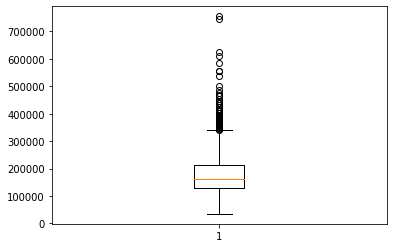

In [18]:
plt.boxplot(train['SalePrice'])

SalePrice가 700000 이상인 것이 두개가 있다. 이상치에 해당하는 값이므로 제외한다. 

In [19]:
train = train[train['SalePrice']<700000]

### Scaling

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 34900.,  35311.,  37900., ..., 582933., 611657., 625000.])),
 (72478.01989009931, 180140.56652949247, 0.9440596043442289))

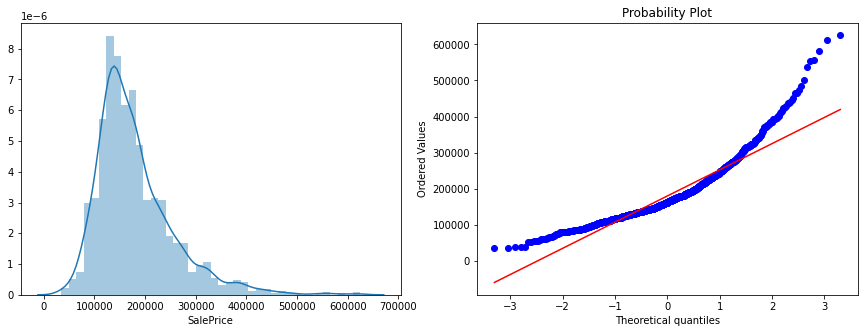

In [20]:
plt.figure(figsize = (15, 5))

# distplot
plt.subplot(1, 2, 1)
sns.distplot(train['SalePrice'])


plt.subplot(1, 2, 2)
# Q-Q Plot
import scipy.stats as stats
stats.probplot(train['SalePrice'], plot=plt)

In [21]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.567321
Kurtosis: 3.894915


It is apparent that SalePrice doesn't follow normal distribution, so before performing regression it has to be transformed.   
SalePrice가 정규성을 띄지 않으므로 변환시켜줘야한다. 

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.27582754,
         13.32392695, 13.34550693])),
 (0.3948741328984528, 12.021988136552885, 0.9959649242116186))

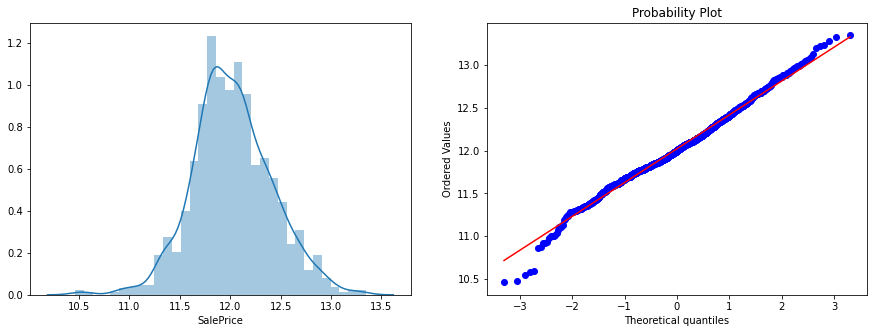

In [22]:
plt.figure(figsize = (15, 5))

# distplot
plt.subplot(1, 2, 1)
sns.distplot(np.log(train['SalePrice']))


plt.subplot(1, 2, 2)
# Q-Q Plot
import scipy.stats as stats
stats.probplot(np.log(train['SalePrice']), plot=plt)

In [23]:
print("Skewness: %f" % np.log(train['SalePrice']).skew())
print("Kurtosis: %f" % np.log(train['SalePrice']).kurt())

Skewness: 0.065158
Kurtosis: 0.671045


SalePrice를 log화했을 때 정규분포와 가까워지므로 SalePrice를 log화 해준다.

In [24]:
# SalePrice를 log화
train['SalePrice'] = np.log(train['SalePrice'])  

### Correlation 상관관계

In [25]:
# SalePrice와의 상관관계
train.corr()['SalePrice'].to_frame().sort_values(by = 'SalePrice', ascending = False).T

,SalePrice,OverallQual,GrLivArea,GarageCars,ExterQual,KitchenQual,GarageArea,BsmtQual,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,FireplaceQu,TotRmsAbvGrd,Fireplaces,HeatingQC,MasVnrArea,GarageQual,BsmtFinSF1,GarageCond,CentralAir,GarageYrBlt,BsmtExposure,WoodDeckSF,OpenPorchSF,HalfBath,2ndFlrSF,BsmtCond,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,LotFrontage,ScreenPorch,MoSold,3SsnPorch,ExterCond,PoolArea,PoolQC,BsmtFinSF2,BsmtHalfBath,MiscVal,Id,YrSold,OverallCond,LowQualFinSF,MSSubClass,KitchenAbvGr,EnclosedPorch
SalePrice,1.0,0.814994,0.693712,0.680006,0.677562,0.665083,0.649975,0.61414,0.605994,0.590151,0.589802,0.58851,0.568607,0.546131,0.53019,0.484595,0.474047,0.422121,0.365492,0.362725,0.35892,0.353712,0.351025,0.332006,0.330466,0.322886,0.310999,0.305994,0.276641,0.255768,0.237982,0.223344,0.204126,0.170511,0.12382,0.062487,0.05605,0.051045,0.037473,0.03443,0.006386,-0.015,-0.019761,-0.020676,-0.034434,-0.036894,-0.037711,-0.075072,-0.147906,-0.14866


1. Scatter plot

In [26]:
# scatter with SalePrice
def sctwsp(c): 
  sns.regplot(x = c, y = 'SalePrice', data = train, scatter=True, line_kws={'color': 'salmon'}, color = 'dimgray')
  plt.xlabel(c)
  plt.ylabel('SalePrice')

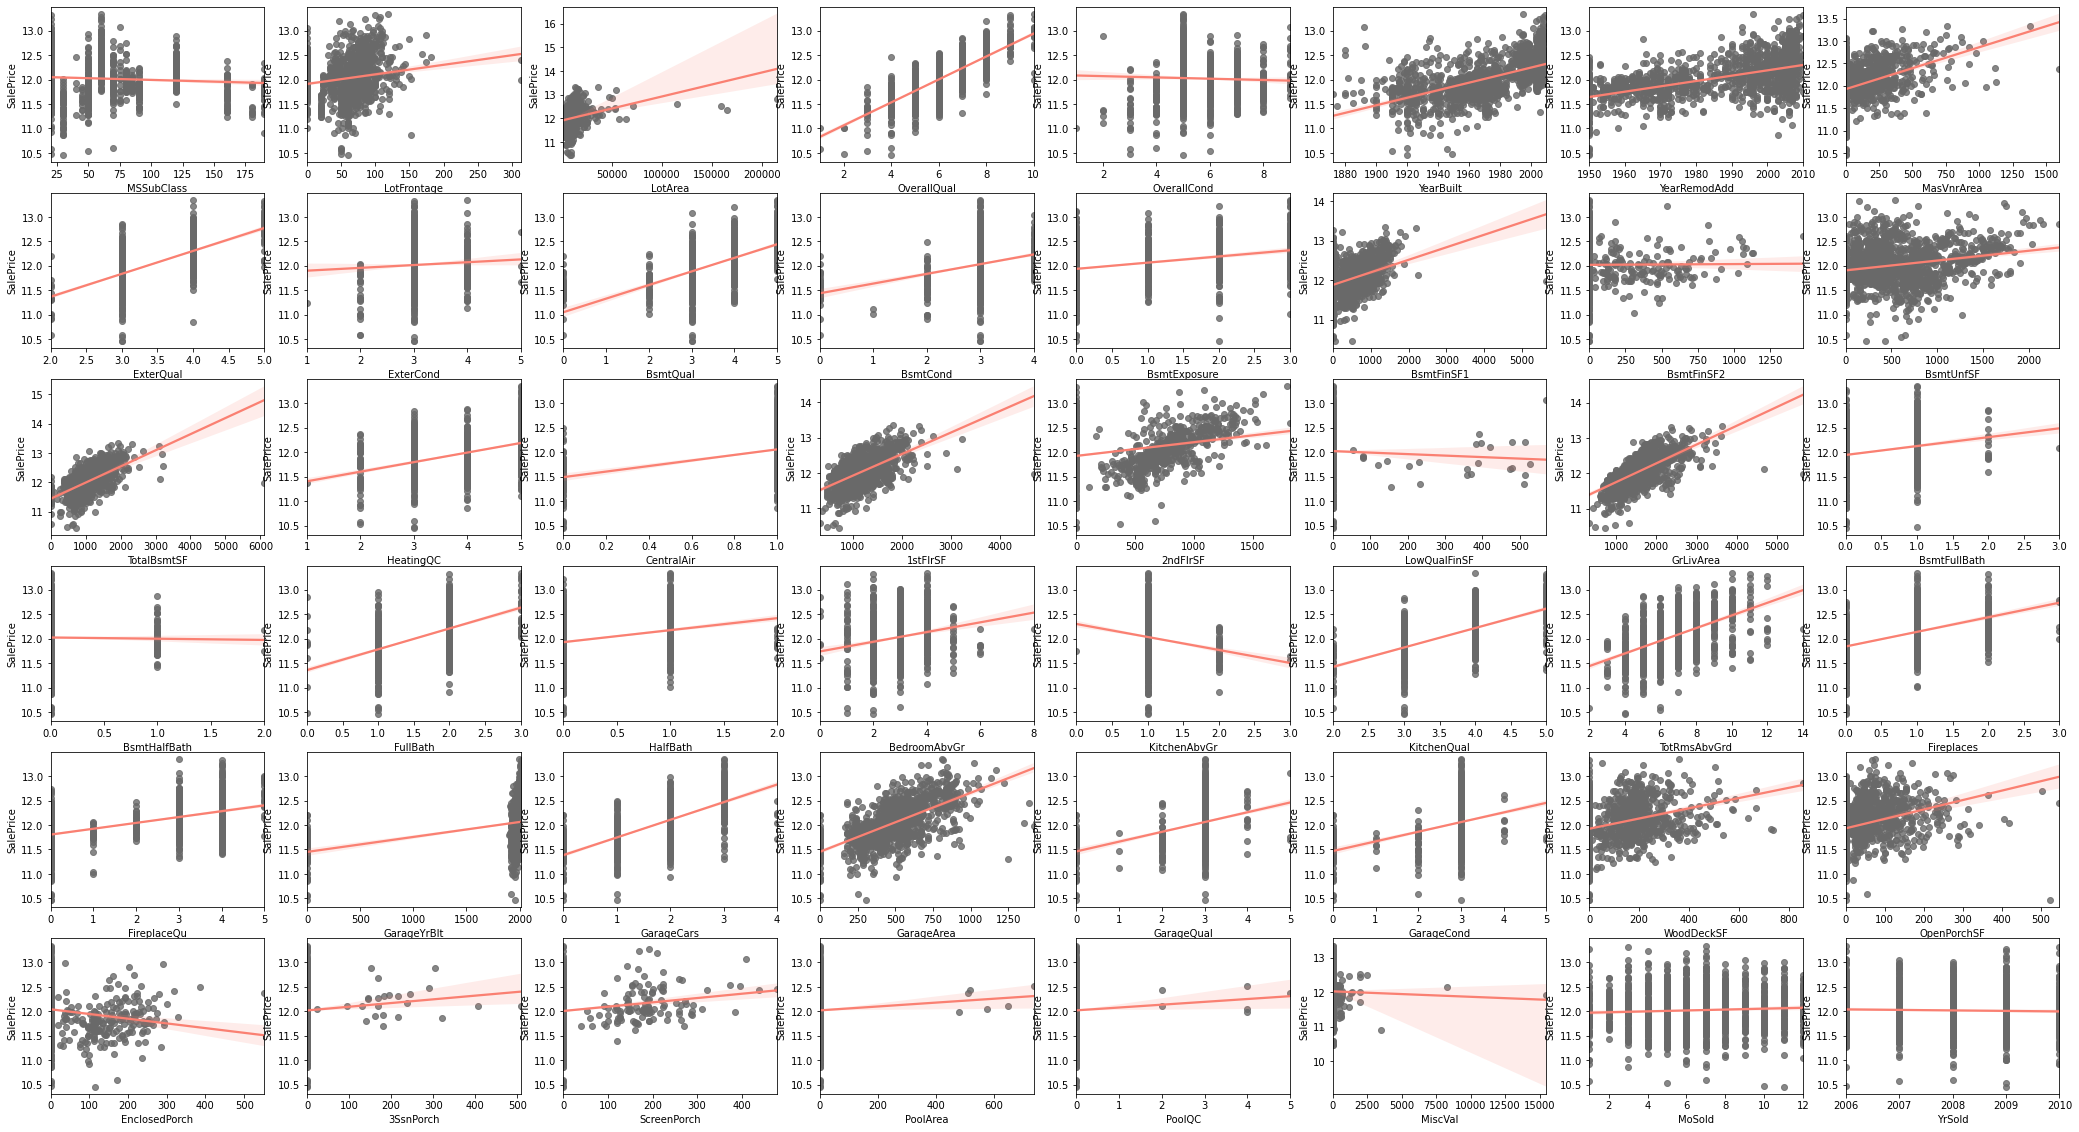

In [28]:
col = list(train.corr()['SalePrice'].index)
col.remove('Id')
col.remove('SalePrice')

plt.figure(figsize = (36, 20))
for i in col:
  plt.subplot(6, 8, col.index(i)+1)
  sctwsp(i)

2. Heatmap   


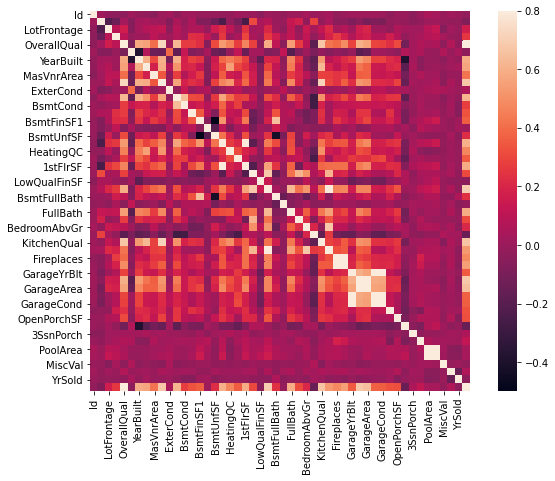

In [29]:
f, ax = plt.subplots(figsize=(10, 7))
# 상관관계 행렬
corrmat = train.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

### Categorical 범주형 변수

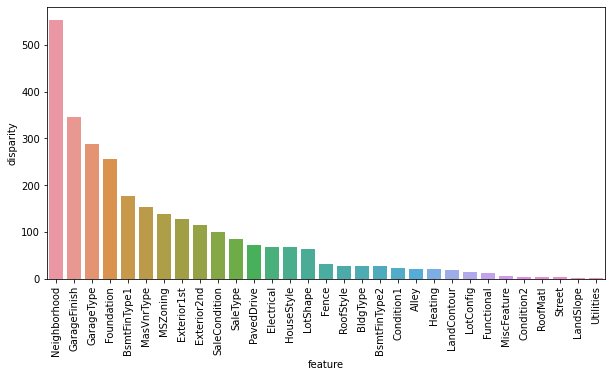

In [30]:
#어떤 변수가 영향을 많이 주는가?

import scipy.stats as st

qualitative = [f for f in train.columns if train.dtypes[f] == 'object']   #object인 column만 선택
def anova(frame):
    anv = pd.DataFrame()   #빈 데이터프레임 만들기
    anv['feature'] = qualitative   #feature에 object변수
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = st.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train)
a['disparity'] = np.log(1./a['pval'].values)
plt.figure(figsize=(10,5))
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

# 참고 : https://www.kaggle.com/dgawlik/house-prices-eda  

In [31]:
anova(train)['feature']

8      Neighborhood
25     GarageFinish
24       GarageType
18       Foundation
19     BsmtFinType1
17       MasVnrType
0          MSZoning
15      Exterior1st
16      Exterior2nd
30    SaleCondition
29         SaleType
26       PavedDrive
22       Electrical
12       HouseStyle
3          LotShape
27            Fence
13        RoofStyle
11         BldgType
20     BsmtFinType2
9        Condition1
2             Alley
21          Heating
4       LandContour
6         LotConfig
23       Functional
28      MiscFeature
10       Condition2
14         RoofMatl
1            Street
7         LandSlope
5         Utilities
Name: feature, dtype: object

Anova 분산분석 : 각 집단의 모집단분산이 차이가 있는지에 대한 검정과 모집단평균이 차이가 있는지 검정하는 방법으로 사용한다.

2. Boxplot

In [33]:
# scatter with SalePrice
def boxwsp(c): 
  sns.boxplot(x = c, y = 'SalePrice', data = train)
  plt.xlabel(c)
  plt.ylabel('SalePrice')

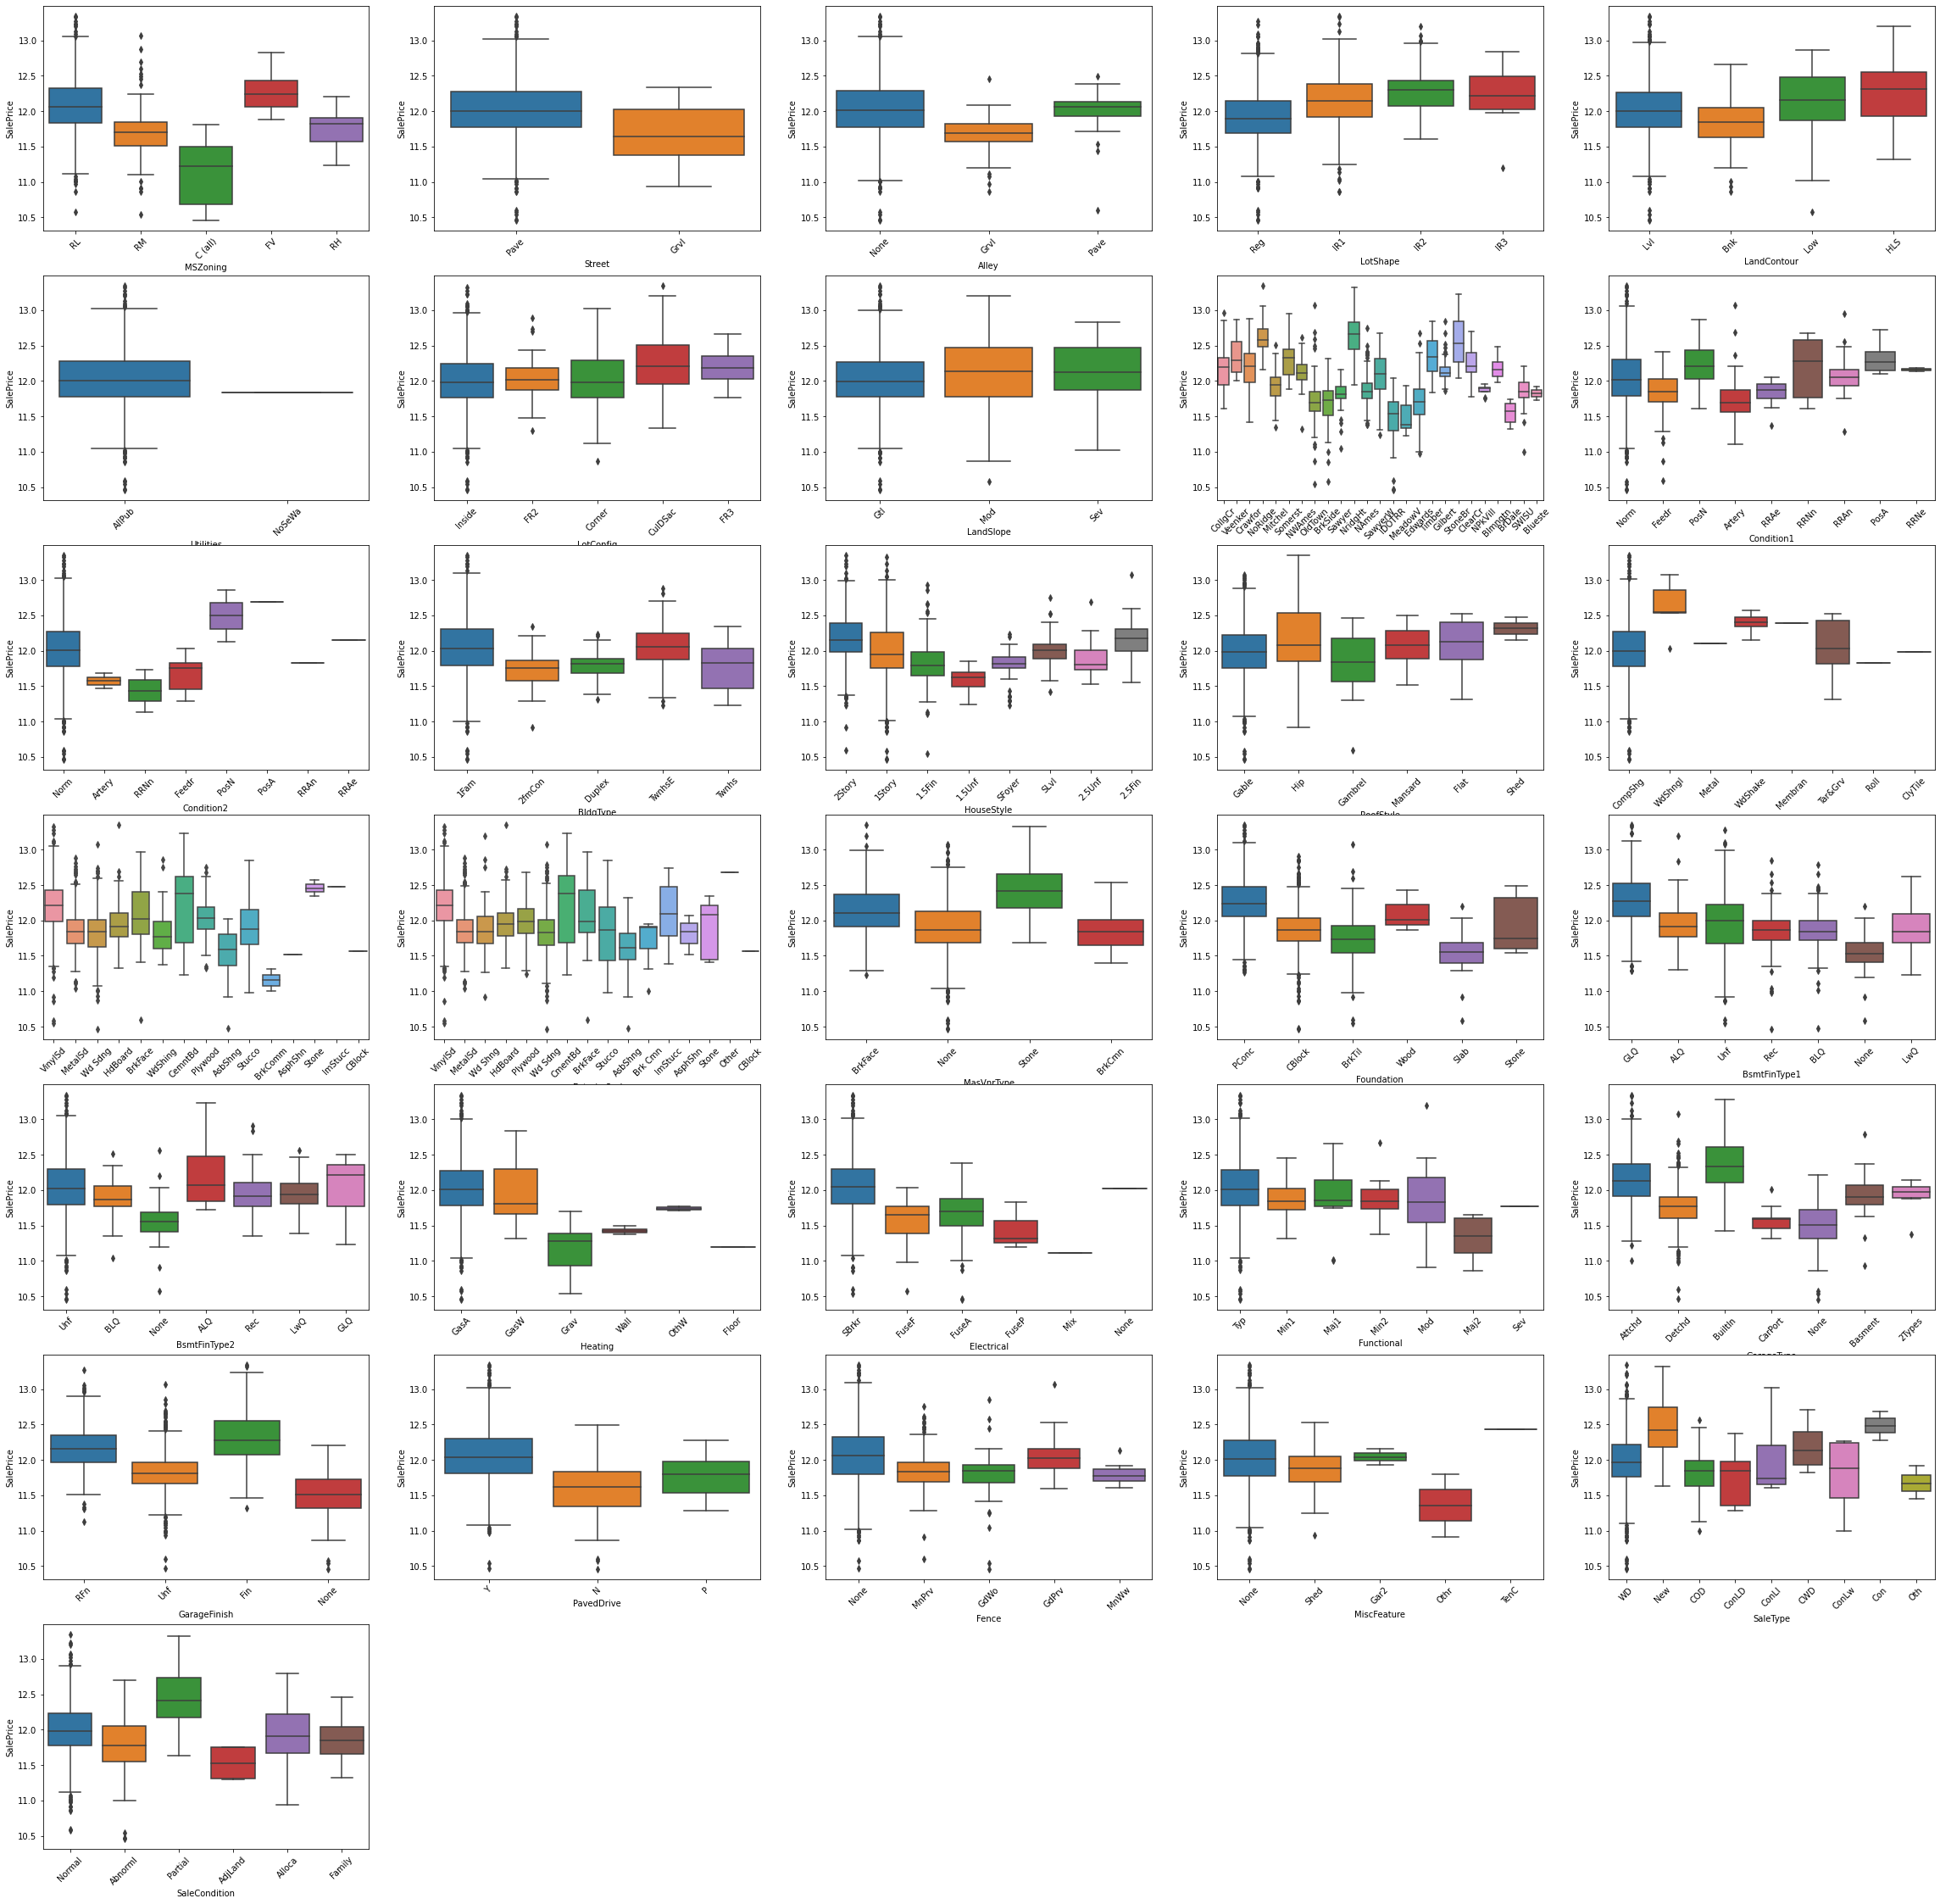

In [34]:
col = [f for f in train.columns if train[f].dtypes == 'object']

plt.figure(figsize = (40, 40))
for i in col:
  plt.subplot(7, 5, col.index(i)+1)
  plt.xticks(rotation = 45)
  boxwsp(i)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

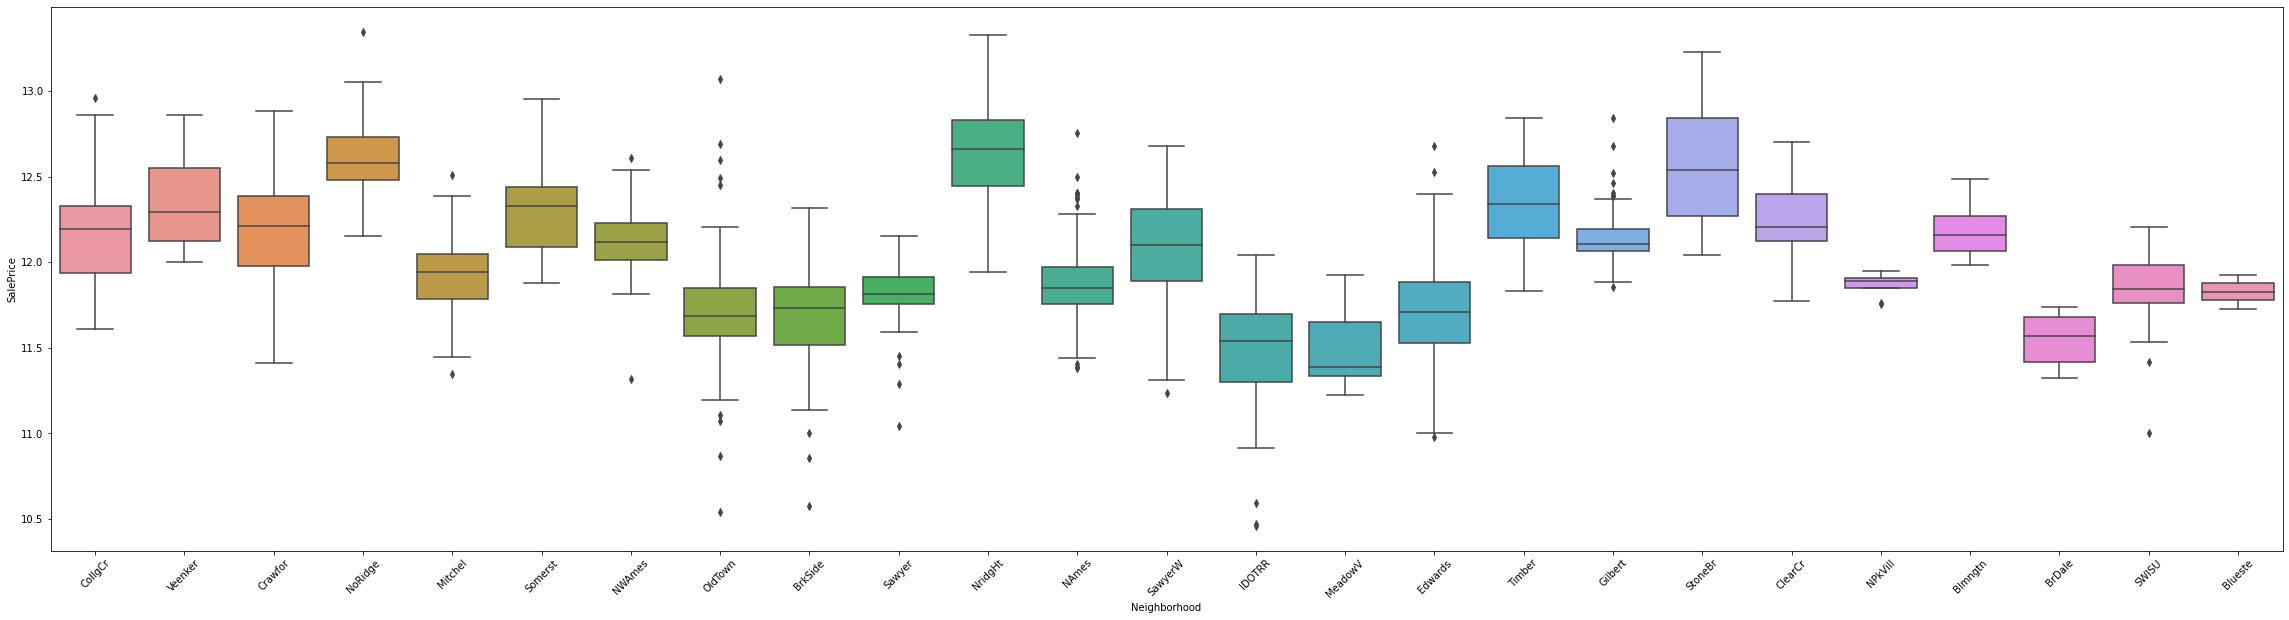

In [35]:
plt.figure(figsize = (40, 10))

boxwsp('Neighborhood')
plt.xticks(rotation=45)

### Labelling

In [36]:
total = pd.concat([train, test], axis = 0)
total.reset_index(drop = True, inplace = True)

In [37]:
col = [f for f in total.columns if total[f].dtypes == 'object']

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for c in col:
  total[c] = le.fit_transform(total[c])

In [39]:
train = total[total['SalePrice'].notnull()]
test = total[total['SalePrice'].isnull()]

print(train.shape, test.shape)

(1458, 81) (1459, 81)


## Modelling

In [40]:
X = train.drop(['SalePrice'], axis = 1)
y = train['SalePrice']

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=100)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(1020, 80) (438, 80) (1020,) (438,)


### Linear Regression

필요한 열만 남기기

In [42]:
X = train.drop(['SalePrice', 'Id', 'PoolQC', 'Alley', '3SsnPorch',	'ExterCond',	'PoolArea',	
                'BsmtFinSF2',	'BsmtHalfBath',	'MiscVal',	'YrSold',	'OverallCond',	'LowQualFinSF',	'MSSubClass', 'LandSlope', 'Utilities'], axis = 1)
y = train['SalePrice']

train test 나누기

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=1000)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(874, 65) (584, 65) (874,) (584,)


Linear Regression의 RMSE : 0.1496299697419265

In [44]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)

In [45]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_valid, y_pred))
print('Linear Regression의 RMSE :', rms)

Linear Regression의 RMSE : 0.14959341174033808


#### Decision Tree

In [46]:
X = train.drop(['SalePrice', 'Id', 'PoolQC'], axis = 1)
y = train['SalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=1000)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(874, 78) (584, 78) (874,) (584,)


In [47]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state = 0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_valid)

In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_valid, y_pred))
print('Decision Tree의 RMSE :', rms)

Decision Tree의 RMSE : 0.20188223522761153


### XGboost

In [49]:
X = train.drop(['SalePrice', 'Id'], axis = 1)
y = train['SalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=1000)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(874, 79) (584, 79) (874,) (584,)


In [50]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(colsample_bytree=0.5,                 
                 learning_rate=0.08,
                 max_depth=3,
                 min_child_weight=1.2,
                 n_estimators=550,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.3,
                 subsample=0.8,
                 seed=500,
                 eval_metric = 'rmse')
xgb_model.fit(X_train,y_train)
y_pred_xgb = xgb_model.predict(X_valid)

rms = sqrt(mean_squared_error(y_valid, y_pred_xgb))
print('XGboost의 RMSE :', rms)

[11:30:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGboost의 RMSE : 0.11818652840180364


In [52]:
X_test = test.drop(['Id', 'SalePrice'], axis = 1)
y_test = test['SalePrice']

In [53]:
test['SalePrice'] = list(map(lambda x: np.exp(x), list(xgb_model.predict(X_test))))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
test['Id'] = test.index + 3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
submission = test[['Id', 'SalePrice']]

In [56]:
submission

,Id,SalePrice
1458,1461,125707.554688
1459,1462,154832.328125
1460,1463,178873.093750
1461,1464,190291.250000
1462,1465,188731.718750
...,...,...
2912,2915,80532.820312
2913,2916,80223.140625
2914,2917,149405.468750
2915,2918,109901.718750


In [ ]:
submission.to_csv('submission.csv', index = False)

In [ ]:
kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "Message"